### **TP Final TP Final Aprendizaje de Máquina I:**
Evaluación de la performance de modelos de clasificación con datos tumores de cáncer de mama en *malignos* o *benignos*.

Estudiantes:


*   Gustavo Julián Rivas
*   Myrna Lorena Degano
*   Santiago José Olaciregui
*   Fabricio Lopretto

## 4 - Algoritmos:

Originalmente la variable objetivo 'diagnosis' es categórica dado que puede tomar valors 'M' (maligno) o 'B' (benigno). Esto permite encarar la aplicación de algoritmos de clasificación. No obstante, la creación de la variable 'dummy' 'diagnosis_M' permite aplicar algoritmos de regresión dado la naturaleza numérica del objetivo creado.

A partir de lo anterior, se decidió aplicar y comparar los resultados de los siguientes modelos:

4.1 Regresión Logística.

4.2 SVC.

4.3 Árbol de Clasificación.

4.4 Perceptrón.

Los atributos categóricos son:

Atributo |
:---: | 
`diagnosis`|         

Luego del análisis de datos y de la ingeniería de características, se obtuvo que las
características relevantes son :

Atributo |
:---: |
`radio_mean` |
`radio_worst` |    
`concavity_mean` |     
`concavity_worst`|
`concave_points_worst`|



In [ ]:
"""
Este script permite implementar y evaluar el desempeño de modelos de regresión.
"""

In [1]:
# Importa las librerias nencesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Define la ruta al archivo de datos
directorio_actual = os.getcwd()
directorio_padre = os.path.dirname(directorio_actual)
directorio_datos = directorio_padre + '/Data/data_para_entrenamiento_v2.xlsx'

In [3]:
# Carga del DataFrame con los registros que tienen los atributos y target.
df = pd.read_excel(directorio_datos, sheet_name='data')

In [4]:
# Visualiza informacion del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   diagnosis             550 non-null    object 
 1   radio_mean            550 non-null    float64
 2   concavity_mean        550 non-null    float64
 3   radio_worst           550 non-null    float64
 4   concavity_worst       550 non-null    float64
 5   concave_points_worst  550 non-null    float64
dtypes: float64(5), object(1)
memory usage: 25.9+ KB


In [5]:
# Importa split de datos, busqueda de hiper-parametros, estandarizacion y metricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Separa las caracteristicas y el objetivo
X = df.loc[:, ['radio_mean', 'radio_worst', 'concavity_mean', 'concavity_worst', 'concave_points_worst']].values
y = df.loc[:, "diagnosis"].values

In [8]:
# Divide los datos en conjunto de entrenamiento y prueba 80/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normaliza el set de entrenamiento y de prueba de las caracteristicas
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

#### 4.1 Regresión Logística

In [10]:
# Importa el algoritmo
from sklearn.linear_model import LogisticRegression

In [11]:
# Define la grilla de hiper-parametros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Hiperparámetro para la regularización
    'solver': ['liblinear', 'lbfgs']  # Solvers para la optimización
}

In [12]:
# Asigna el modelo
model = LogisticRegression(max_iter=1000)

In [13]:
# Configura la busqueda de hiper-parametros por grilla con validacion cruzada
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # Puedes ajustar la métrica según lo que prefieras

In [14]:
# Entrena el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [15]:
# Obtiene el mejor modelo
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

Mejores hiperparámetros: LogisticRegression(C=10, max_iter=1000)


In [17]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

In [18]:
# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Muestra metricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8974358974358975
Recall: 0.9722222222222222
F1 Score: 0.9333333333333333


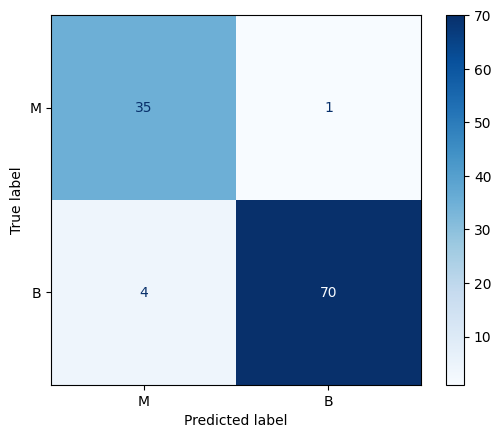

In [19]:
# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 4.2 SVM

In [20]:
# Importa el algoritmo
from sklearn.svm import SVC

In [21]:
# Define la grilla de hiperparametros
param_grid = {
    'C': [0.1, 1, 10, 100],  # Hiperparámetro para la regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipos de núcleos
    'gamma': ['scale', 'auto']  # Parámetro del núcleo
}

In [22]:
# Support Vector Classifier
model = SVC()  

In [23]:
# Define la grilla de hiper-parametros
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') 

In [24]:
# Entrena el modelo
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [25]:
# Obtiene los mejores hiper-parametros
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

Mejores hiperparámetros: SVC(C=10)


In [26]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Mostrar métricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1 Score: 0.918918918918919


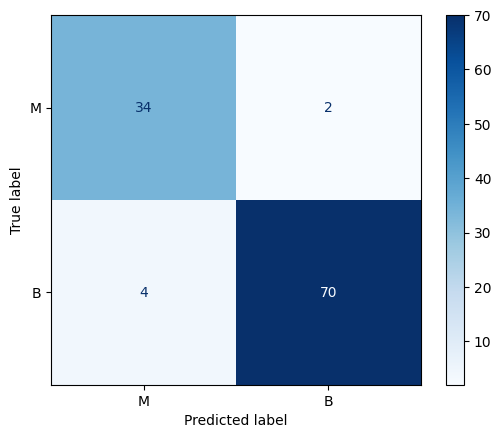

In [27]:
# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 4.3 Árbol de Clasificación

In [28]:
# Importa el algoritmo
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Crea el modelo de arbol de clasificacion
model = DecisionTreeClassifier()

In [30]:
# Define la grilla de hiper-parametros
param_grid = {
    'criterion': ['gini', 'entropy'],  # Funcion para medir la calidad de una division
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima del arbol
    'min_samples_split': [2, 5, 10],   # Numero minimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4]      # Numero minimo de muestras requeridas para estar en una hoja
}

In [31]:
# Configura GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [32]:
# Entrena el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [33]:
# Obtiene los mejores hiper-parametros
best_model = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {best_model}")

Mejores hiperparámetros: DecisionTreeClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5)


In [34]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Calcula metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Mostrar métricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9166666666666666
Recall: 0.9166666666666666
F1 Score: 0.9166666666666666


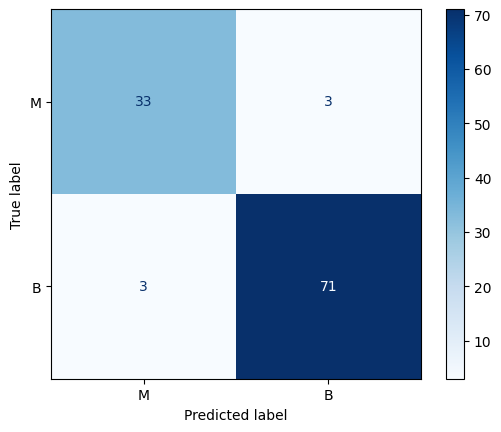

In [35]:
# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### 4.4 Perceptrón

In [36]:
# Importa el algoritmo
from sklearn.linear_model import Perceptron

In [37]:
# Crea el modelo de perceptron
model = Perceptron()

In [38]:
# Define la grilla de hiper-parametros
param_grid = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],  # Tipo de regularizacion
    'alpha': [0.0001, 0.001, 0.01],  # Parametro de regularizacion
    'max_iter': [1000, 5000, 10000],  # Numero maximo de iteraciones
    'eta0': [1.0, 0.1, 0.01]  # Tasa de aprendizaje inicial
}

In [39]:
# Realiza la busqueda de hiperparametros con GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

In [40]:
# Entrena el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [1.0, 0.1, 0.01],
                         'max_iter': [1000, 5000, 10000],
                         'penalty': [None, 'l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [41]:
# Obtiene los mejores hiperparametros
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", best_model)

Mejores hiperparámetros: Perceptron(penalty='elasticnet')


In [42]:
# Obtiene las metricas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Metricas
precision = precision_score(y_test, y_pred, pos_label='M')  # Asegúrate de que 'M' sea la etiqueta positiva
recall = recall_score(y_test, y_pred, pos_label='M')
f1 = f1_score(y_test, y_pred, pos_label='M')
conf_matrix = confusion_matrix(y_test, y_pred, labels=['M', 'B'])

# Mostrar métricas
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.5892857142857143
Recall: 0.9166666666666666
F1 Score: 0.717391304347826


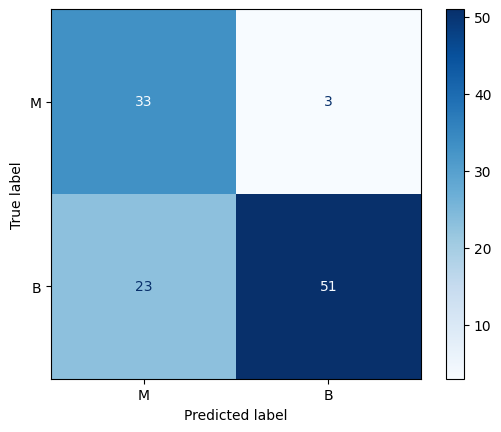

In [43]:
# Muestra matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['M', 'B'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

Se realizó una tabla comparativa de los resultados de las métricas sobre el conjunto datos de prueba:

| Modelo                 | Presición | Recall | F1-Score |
|------------------------|-----------|--------|----------|
| Regresión Logistica    |    0.90   |  0.97  |   0.93   |
| SVC                    |    0.90   |  0.94  |   0.92   |
| Árbol de Clasificación |    0.92   |  0.92  |   0.92   |
| Perceptrón             |    0.59   |  0.92  |   0.72   |

Conclusiones: En general las métricas arrojan una buena performance de los cuatro modelos. El que menos performance muestra es el perceptrón.

Bibliografía:

Isabelle Guyon, Andre Elisseeff (2003). An introduction to variable and feature selection. Journal of Machine Learning Research 3 (2003) 1157-1182


Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.


W. Street, W. Wolberg, O. Mangasarian. (1992)
Nuclear feature extraction for breast tumor diagnosis.
Published in Electronic imaging.


